# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Train dataframe

In [2]:
train_df = pd.read_csv("/content/train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Look at data
train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931


## Data description


Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

Promo - indicates whether a store is running a promo on that day

In [4]:
# Check the data size

print('No of rows : ', train_df.shape[0])
print('No of columns : ', train_df.shape[1] )

No of rows :  1001599
No of columns :  10


In [5]:
# Check for missing values in our data

train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

We see that there are no null values in our data set. If number of null values are too low we can ignore them. If there were large number of missing values we would go for other strategies to handle the missing values.

For numerical variables we can go for imputation by mean/mode/median. For categorical variables we can assign missing values to a separate category. We can also use machine learning to predict the values of that variable based on other variable known to us.

In [6]:
# Look at osome statistics for different variables. 

train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id
count,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06
mean,5.584364e+02,3.998315e+00,5.770573e+03,6.333030e+02,8.296454e-01,3.818944e-01,1.734596e-01,5.085189e+05
std,3.219092e+02,1.997350e+00,3.852568e+03,4.649430e+02,3.759442e-01,4.858511e-01,3.786443e-01,2.934647e+05
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.722000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.544410e+05
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,5.088100e+05
75%,8.380000e+02,6.000000e+00,7.854000e+03,8.380000e+02,1.000000e+00,1.000000e+00,0.000000e+00,7.626425e+05
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.017207e+06


## Preprocessing 

Split date column into date, month, year

In [7]:
train_df[["year", "month", "day"]] = train_df["Date"].str.split("-", expand = True)

In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,year,month,day
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,2015,07,17
1,2,5,2015-07-17,4518,495,1,1,0,1,959585,2015,07,17
2,3,5,2015-07-17,6679,673,1,1,0,1,739744,2015,07,17
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001,2015,07,17
4,5,5,2015-07-17,4355,513,1,1,0,1,981931,2015,07,17


## Correlation Matrix heatmap

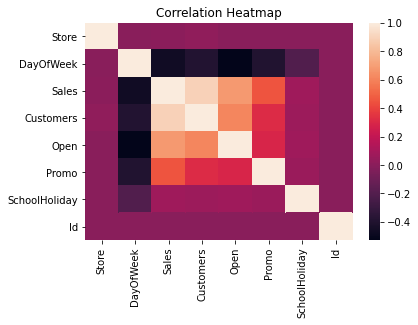

In [9]:
corr = train_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title('Correlation Heatmap')

plt.show()

This plot summarizes the correlation between all variable. Here we can analyze which variables are mostly correlated and should be noted to avoid multicolinearity problem later.

No of customer has strong correlation with sales as expected. Promo also has high correlation with Sales

## Sales

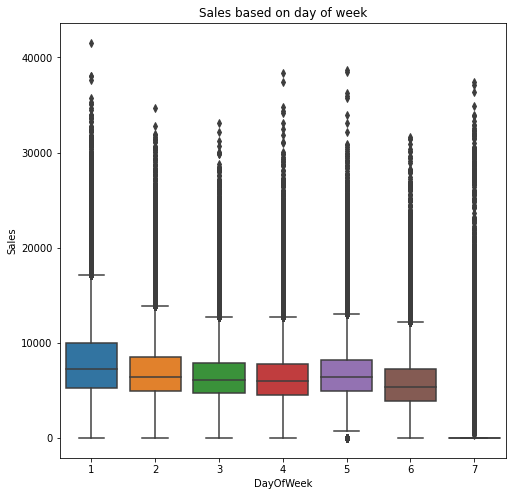

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train_df,x="DayOfWeek",y="Sales")
plt.title('Sales based on day of week')
plt.show()

Here we see that sales is high on 1st day of week. Good opportunity for advertising new products. To find why on day 7 the sales is close to zero, we can look at the variable 'open'.

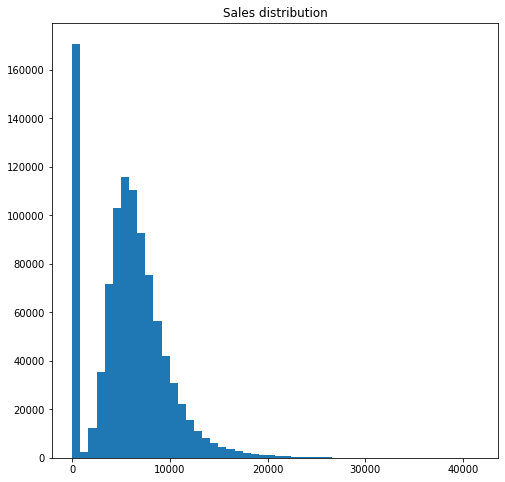

In [11]:
plt.figure(figsize=(8,8))
plt.hist('Sales', data= train_df, bins = 50)
plt.title('Sales distribution')
plt.show()

This shows that most of the sales per day were zero. Ignoring that we see that mostly sales were around 6000. Lets look why sales were around zero on day 7 and why most of sales are zero. 

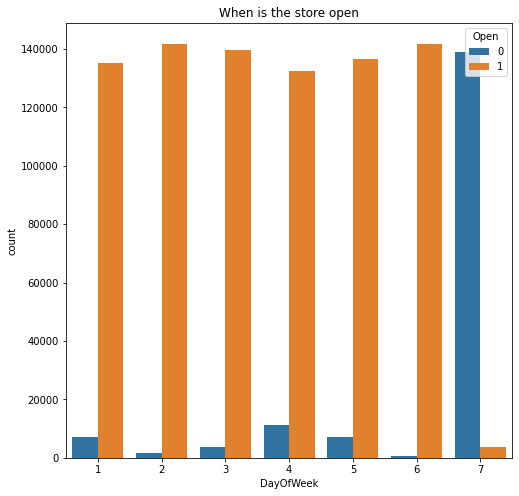

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = train_df)
plt.title('When is the store open')
plt.show()

We can clearly see that on day 7 the store was mostly closed. This is why Sales on this day were low. And this shows why sales were mostly zero in the sales ditribution plot 

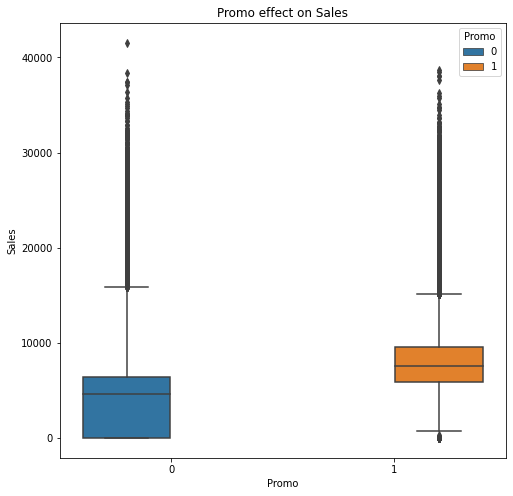

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train_df,x="Promo", hue = 'Promo',y="Sales")
plt.title('Promo effect on Sales')
plt.show()

This plot clearly explains that promo has strong effect on Sales. We still see some outliers in both the cases. Which can be due to holidays or other events.

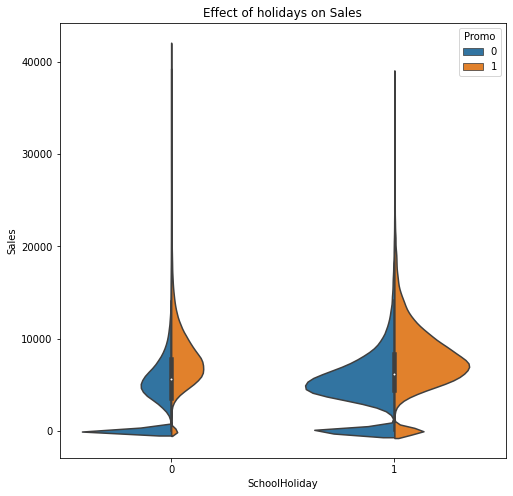

In [14]:
plt.figure(figsize=(8,8))
sns.violinplot(x='SchoolHoliday',y='Sales',hue='Promo',split=True,data=train_df)
plt.title('Effect of holidays on Sales')
plt.show()

Violin plot - The white dot represents the median. The thick gray bar in the center represents the interquartile range

The graph clearly shows that holidays combined with promo have strong effect on Sales.

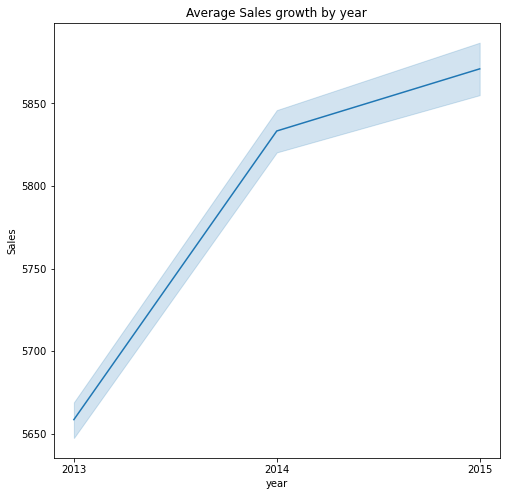

In [15]:
plt.figure(figsize=(8,8))
sns.lineplot(data = train_df.sort_values(by = 'year'), x = 'year', y = "Sales")
plt.title('Average Sales growth by year')
plt.show()

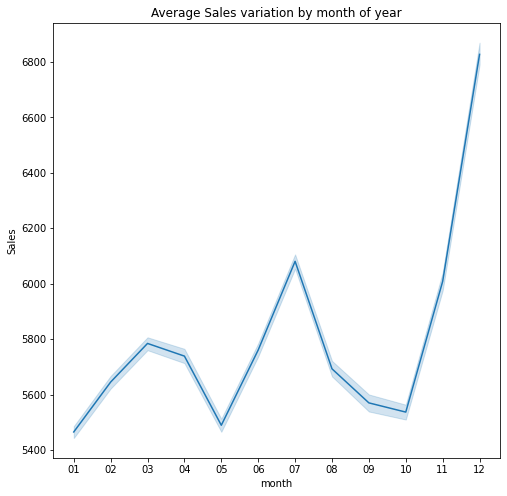

In [16]:
plt.figure(figsize=(8,8))
sns.lineplot(data = train_df.sort_values(by = 'month'), x = 'month', y = "Sales")
# plt.gca().invert_xaxis()
plt.title('Average Sales variation by month of year')
plt.show()

Lineplot average y variable. We see sales increase in July and November, December. This can be the effect of black friday sales, christmas.  